# ANALITICA CON HISTOGRAMA INVOCANDO A LA API CREADA

CONSUMO LAS LIBRERIAS Y FUNCIONES AUXILIARES

In [20]:
import requests
import pandas as pd  
import matplotlib.pyplot as plt



## PREGUNTA I - ¿Cuáles son los ingresos por departamento?

### OBTENGO LOS DATOS DEL API

In [22]:
##URL DEL API
url='http://127.0.0.1:5000/subtotalByDepartment'

##LLAMO A LA API
data=requests.get(url)

id=[]
nombre=[]
totales=[]

##ALMACENO LOS VALORES EN LISTAS POR CADA COLUMNA PARA FORMAR UN DATAFRAME
if(data.status_code==200):
    data=data.json()
    for e in data:
        id.append(e['department_id']) 
        nombre.append(e['department_name']) 
        totales.append(e['subtotal']) 


##CREO EL DATAFRAME
dfsubtotalByDepartments=pd.DataFrame()

##ASIGNO CADA LISTA AL DATAFRAME
dfsubtotalByDepartments['ID_DEPARTAMENTO']=id
dfsubtotalByDepartments['DEPARTAMENTO']=nombre
dfsubtotalByDepartments['SUBTOTAL']=totales


dfsubtotalByDepartments=dfsubtotalByDepartments.sort_values(by='SUBTOTAL',ascending=False)
dfsubtotalByDepartments.head(10)

,ID_DEPARTAMENTO,DEPARTAMENTO,SUBTOTAL
0,7,Fan Shop,17107765.88
2,4,Apparel,7323700.20
1,5,Golf,4609028.22
4,3,Footwear,4006498.77
3,6,Outdoors,995582.72
5,2,Fitness,280044.14


### GENERAMOS EL HISTOGRAMA

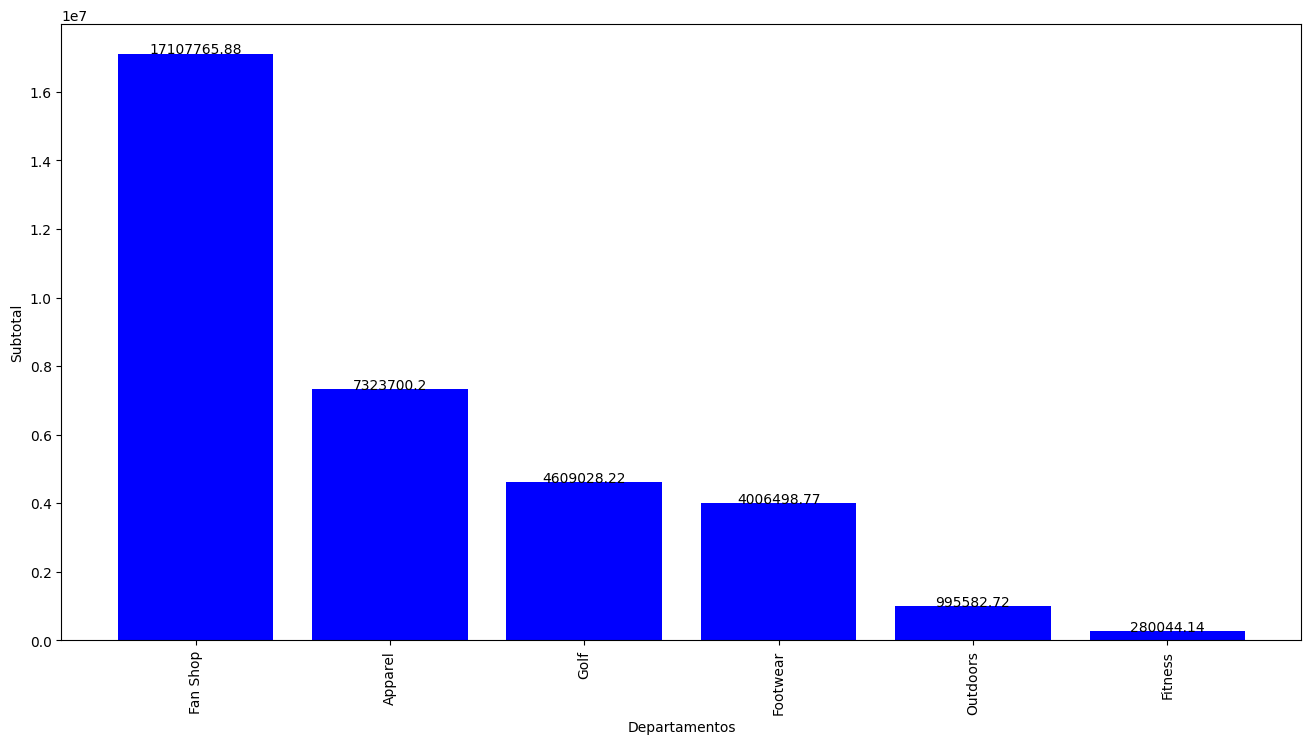

In [35]:
##FUNCION PARA LA ETIQUETAS DE DATOS
def add_value_label(x_list,y_list):
    n=len(x_list)+1
    for i in range(1, n):
        plt.text(i-1,y_list[i-1],y_list[i-1], ha="center",color='black')

##DEFINIMOS EL EJE X
departamentos=dfsubtotalByDepartments['DEPARTAMENTO'].values.tolist()
##DEFINIMOS EL EJE Y
subtotales=dfsubtotalByDepartments['SUBTOTAL'].values.tolist()

##ARMAMOS EL HISTOGRAMA
plt.figure(figsize=(16,8))
plt.bar(departamentos,subtotales,color="blue")
add_value_label(departamentos,subtotales)
plt.xticks(rotation=90)
plt.ylabel("Subtotal")
plt.xlabel("Departamentos")
plt.show()

## PREGUNTA II - ¿Cuáles son los ingresos por departamento?

### OBTENGO LOS DATOS DEL API

In [38]:
##URL DEL API
url='http://127.0.0.1:5000/quantityByCategory'

##LLAMO A LA API
data=requests.get(url)

id=[]
nombre=[]
cantidades=[]

##ALMACENO LOS VALORES EN LISTAS POR CADA COLUMNA PARA FORMAR UN DATAFRAME
if(data.status_code==200):
    data=data.json()
    for e in data:
        id.append(e['category_id']) 
        nombre.append(e['category_name']) 
        cantidades.append(e['order_item_quantity']) 


##CREO EL DATAFRAME
dfquantityByCategory=pd.DataFrame()

##ASIGNO CADA LISTA AL DATAFRAME
dfquantityByCategory['ID_CATEGORIA']=id
dfquantityByCategory['CATEGORIA']=nombre
dfquantityByCategory['CANTIDAD']=cantidades


dfquantityByCategory=dfquantityByCategory.sort_values(by='CANTIDAD',ascending=False)
dfquantityByCategory.head()

,ID_CATEGORIA,CATEGORIA,CANTIDAD
23,6,Tennis & Racquet,991
24,11,Fitness Accessories,856
0,17,Cleats,73734
31,4,Basketball,67
25,38,Kids' Golf Clubs,645


### GENERAMOS EL HISTOGRAMA

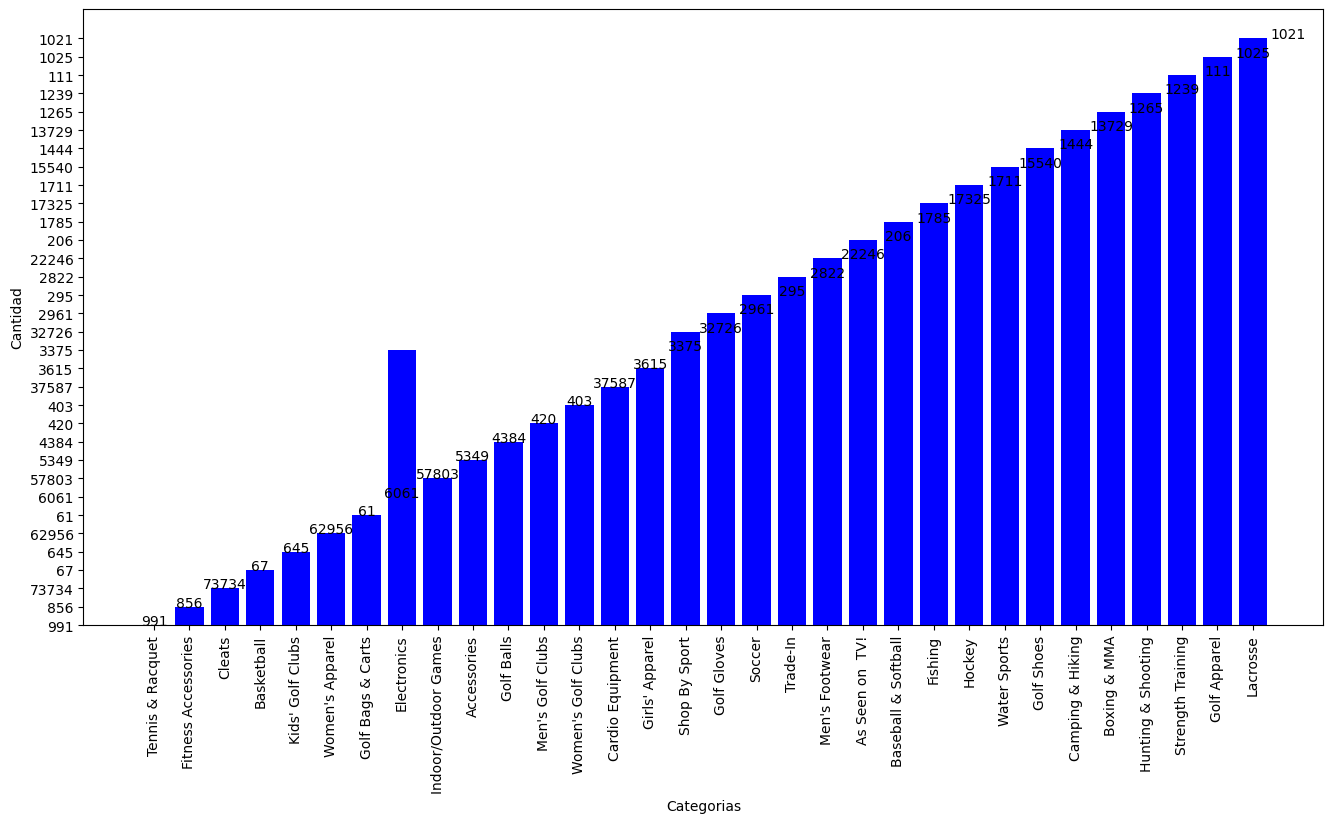

In [40]:
### GENERAMOS EL HISTOGRAMA

##DEFINIMOS EL EJE X
categorias=dfquantityByCategory['CATEGORIA'].values.tolist()
##DEFINIMOS EL EJE Y
cantidades=dfquantityByCategory['CANTIDAD'].values.tolist()

##ARMAMOS EL HISTOGRAMA
plt.figure(figsize=(16,8))
plt.bar(categorias,cantidades,color="blue")
add_value_label(categorias,cantidades)
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.xlabel("Categorias")
plt.show()

## PREGUNTA III - ¿Quiénes son el top 10 de clientes que generan más compras para fidelizarlos?

### OBTENGO LOS DATOS DEL API

In [41]:
##URL DEL API
url='http://127.0.0.1:5000/topTenCustomers'

##LLAMO A LA API
data=requests.get(url)

id=[]
cliente=[]
cantidades=[]

##ALMACENO LOS VALORES EN LISTAS POR CADA COLUMNA PARA FORMAR UN DATAFRAME
if(data.status_code==200):
    data=data.json()
    for e in data:
        id.append(e['customer_id']) 
        cliente.append(e['customer_fname'] + ' ' +e['customer_lname']) 
        cantidades.append(e['order_item_quantity']) 


##CREO EL DATAFRAME
dftopTenCustomers=pd.DataFrame()

##ASIGNO CADA LISTA AL DATAFRAME
dftopTenCustomers['ID_CLIENTE']=id
dftopTenCustomers['CLIENTE']=cliente
dftopTenCustomers['CANTIDAD']=cantidades


dftopTenCustomers=dftopTenCustomers.sort_values(by='CANTIDAD',ascending=False)
dftopTenCustomers.head()

,ID_CLIENTE,CLIENTE,CANTIDAD
1,6786,Robert Smith,655
2,1072,James Smith,632
3,8375,John Smith,619
4,7522,David Smith,594
5,6498,William Smith,466


### GENERAMOS EL HISTOGRAMA

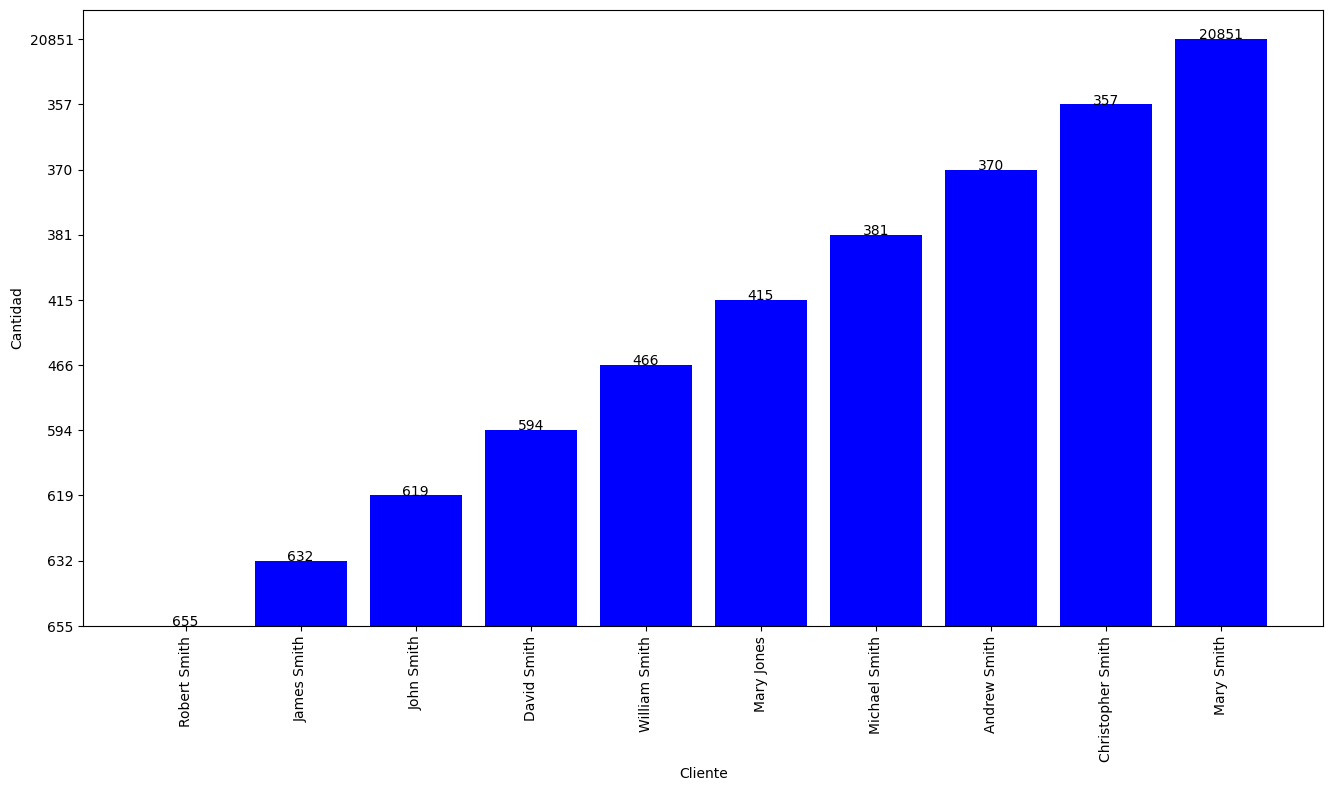

In [44]:

##DEFINIMOS EL EJE X
clientes=dftopTenCustomers['CLIENTE'].values.tolist()
##DEFINIMOS EL EJE Y
cantidades=dftopTenCustomers['CANTIDAD'].values.tolist()

##ARMAMOS EL HISTOGRAMA
plt.figure(figsize=(16,8))
plt.bar(clientes,cantidades,color="blue")
add_value_label(clientes,cantidades)
plt.xticks(rotation=90)
plt.ylabel("Cantidad")
plt.xlabel("Cliente")
plt.show()

## PREGUNTA IV - ¿Cuáles son 10 mejores productos por monto?

In [27]:
##URL DEL API
url='http://127.0.0.1:5000/topTenProducts'

##LLAMO A LA API
data=requests.get(url)

id=[]
nombre=[]
totales=[]

##ALMACENO LOS VALORES EN LISTAS POR CADA COLUMNA PARA FORMAR UN DATAFRAME
if(data.status_code==200):
    data=data.json()
    for e in data:
        id.append(e['product_id']) 
        nombre.append(e['product_name']) 
        totales.append(e['order_item_subtotal']) 


##CREO EL DATAFRAME
dfTopTenProducts=pd.DataFrame()

##ASIGNO CADA LISTA AL DATAFRAME
dfTopTenProducts['ID_PRODUCTO']=id
dfTopTenProducts['NOMBRE_PRODUCTO']=nombre
dfTopTenProducts['SUBTOTAL']=totales

dfTopTenProducts.head(10)

,ID_PRODUCTO,NOMBRE_PRODUCTO,SUBTOTAL
0,1004,Field & Stream Sportsman 16 Gun Fire Safe,6929653.50
1,365,Perfect Fitness Perfect Rip Deck,4431942.66
2,957,Diamondback Women's Serene Classic Comfort Bi,4118425.42
3,191,Nike Men's Free 5.0+ Running Shoe,3694843.20
4,502,Nike Men's Dri-FIT Victory Golf Polo,3147800.00
5,1073,Pelican Sunstream 100 Kayak,3113844.60
6,403,Nike Men's CJ Elite 2 TD Football Cleat,2891757.54
7,1014,O'Brien Men's Neoprene Life Vest,2888993.94
8,627,Under Armour Girls' Toddler Spine Surge Runni,1309522.02
9,828,Bridgestone e6 Straight Distance NFL San Dieg,255679.39


### GENERAMOS EL HISTOGRAMA 

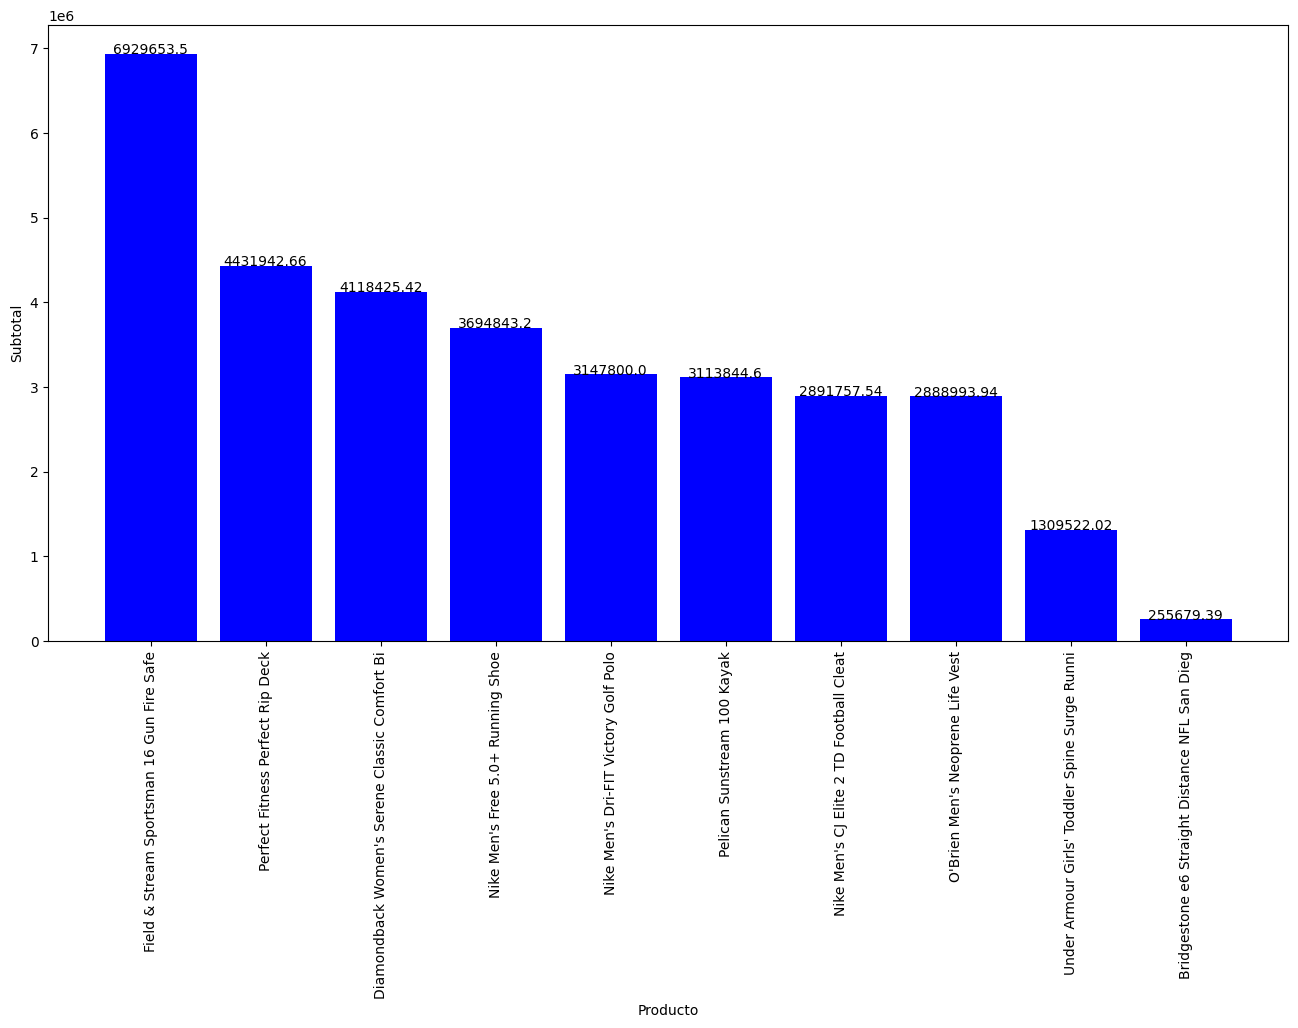

In [43]:
##DEFINIMOS EL EJE X
productos=dfTopTenProducts['NOMBRE_PRODUCTO'].values.tolist()
##DEFINIMOS EL EJE Y
subtotales=dfTopTenProducts['SUBTOTAL'].values.tolist()

##ARMAMOS EL HISTOGRAMA
plt.figure(figsize=(16,8))
plt.bar(productos,subtotales,color="blue")
add_value_label(productos,subtotales)
plt.xticks(rotation=90)
plt.ylabel("Subtotal")
plt.xlabel("Producto")
plt.show()